In [1]:
! pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
! pip install seaborn
import seaborn as sns
import networkx as nx


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


###  Uniformly Sampling DAGs
Talvitie and Koivisto 

Generates a random permutation of the nodes to establish an ordering.

This ordering ensures acyclicity since edges are only added from earlier nodes to later nodes.

For each node (except the first), we consider all previous nodes in the ordering as potential parents.

We randomly choose a number of parents for the current node, uniformly between 0 and max_parents (or the number of possible parents).

Parents are selected uniformly at random from the possible parents

By uniformly selecting the number of parents and the parents themselves, we ensure that each possible DAG has an equal probability of being sampled under the constraints.

In [2]:

def sample_uniform_dag(num_nodes, max_parents=None):
    nodes = list(range(num_nodes))
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    
   
    ordering = np.random.permutation(nodes)
    
    for i in range(1, num_nodes):
        current_node = ordering[i]
        possible_parents = ordering[:i]
        

        if max_parents is not None:
            max_p = min(len(possible_parents), max_parents)
        else:
            max_p = len(possible_parents)
        
        num_parents = np.random.randint(0, max_p + 1)
        
        parents = np.random.choice(possible_parents, size=num_parents, replace=False)

        for parent in parents:
            G.add_edge(parent, current_node)
    
    return G

In [3]:
num_nodes = 25  # Number of nodes in the DAG
max_parents = 4  # Maximum number of parents per node (optional)
N = 1000  # Number of data samples to generate
alpha = 1.0  # Dirichlet parameter (uniform prior)

In [4]:
node_states = {node: [0, 1] for node in range(num_nodes)}
    
# G is my model 
G = sample_uniform_dag(num_nodes, max_parents=max_parents)

In [5]:
import itertools
import pandas as pd
def sample_theta_given_g(G, node_states, alpha=1.0):
    theta = {}
    nodes = list(nx.topological_sort(G))
    for node in nodes:
        parents = list(G.predecessors(node))
        node_state_space = node_states[node]
        num_node_states = len(node_state_space)
        
        if len(parents) == 0:
           
            alpha_vector = np.full(num_node_states, alpha)
            probabilities = np.random.dirichlet(alpha_vector)
            theta[node] = {}
            theta[node][()] = probabilities  
        else:
            
            parent_states = [node_states[parent] for parent in parents]
            parent_configurations = list(itertools.product(*parent_states))
            theta[node] = {}
            for parent_config in parent_configurations:
                # Sample Dirichlet 
                alpha_vector = np.full(num_node_states, alpha)
                probabilities = np.random.dirichlet(alpha_vector)
                theta[node][parent_config] = probabilities
    return theta

In [6]:
theta = sample_theta_given_g(G, node_states, alpha=alpha )# p(theta|G)

In [7]:
def generate_data(G, theta, node_states, N):
    nodes = list(nx.topological_sort(G))
    data = []
    for _ in range(N):
        sample = {}
        for node in nodes:
            parents = list(G.predecessors(node))
            if len(parents) == 0:
                # Sample from the prior distribution 
                probabilities = theta[node][()]
                node_value = np.random.choice(node_states[node], p=probabilities)
                sample[node] = node_value
            else:
                # Sample from the conditional distribution
                parent_values = tuple(sample[parent] for parent in parents)
                probabilities = theta[node][parent_values]
                node_value = np.random.choice(node_states[node], p=probabilities)
                sample[node] = node_value
        data.append(sample)
    return pd.DataFrame(data)

In [8]:
df = generate_data(G, theta, node_states, N)

In [9]:
plt.figure(figsize=(32, 24))
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, arrowstyle='->', arrowsize=20)
plt.title("Uniformly Sampled Bayesian Network Structure (DAG)")
#plt.show()
plt.savefig("Uniformly Sampled Bayesian Network Structure (DAG")
plt.close()    

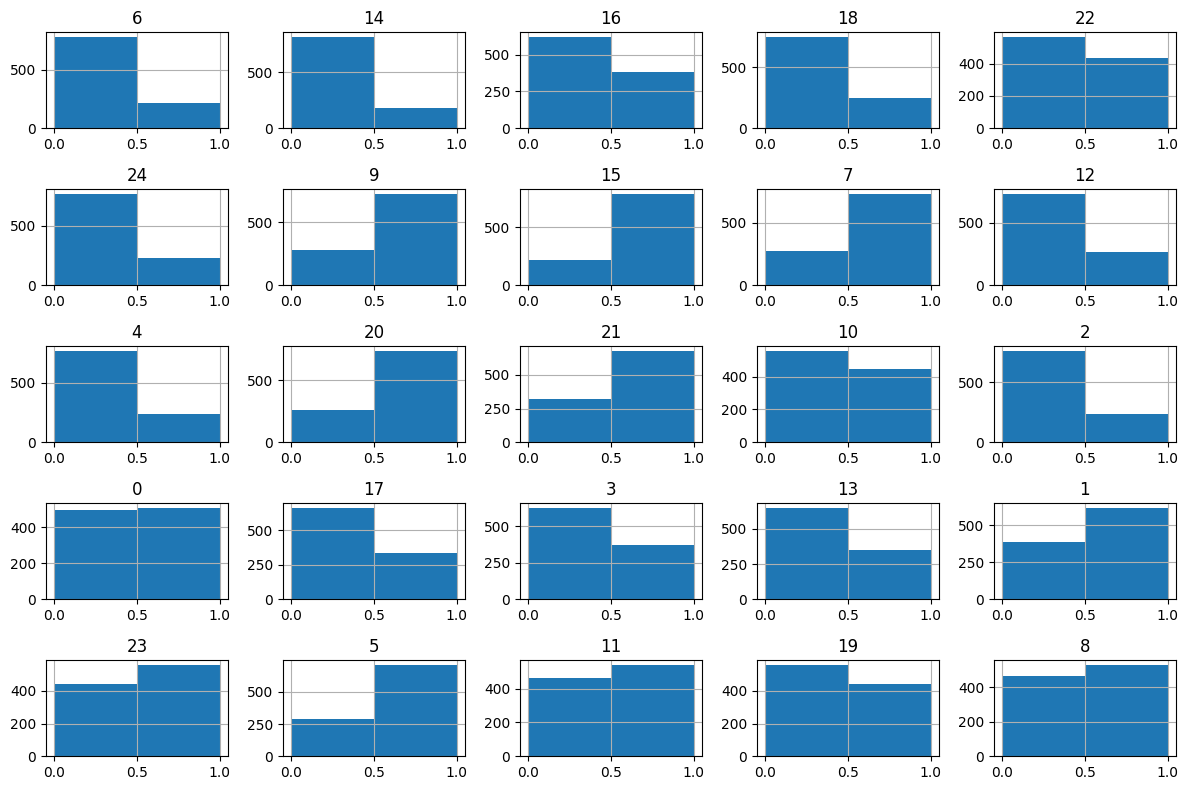

In [10]:

df.hist(bins=2, figsize=(12, 8))
plt.tight_layout()
plt.show()

### gobnilp

In [11]:
import gurobipy

# Get the Gurobi version
gurobi_version = gurobipy.gurobi.version()
gurobi_version

(11, 0, 3)

In [42]:

# df = df.apply(lambda x: x.astype('category'))

columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'u', 'v', 'w', 't', 's', 'x', 'z', 'i', 'ö']
data = [[2] *( len(columns)+0)]  # Each column has an arity of 2

# Convert to DataFrame
df_arity = pd.DataFrame(data, columns=columns)
print(df.columns)
column_mapping = {old: new for old, new in zip(df.columns, df_arity.columns)}
df = df.rename(columns=column_mapping)

# Now, combine the data as before
df_combined_correct = pd.concat([df_arity, df], ignore_index=True)
df_combined_correct.to_csv("combined_dataset.csv", index=False)


# Combine the arity information (first row) with the rest of the dataset
df_combined_correct = pd.concat([df_arity, df])
# Save the DataFrame to a CSV file for inspection or future use
df_arity.to_csv("original_dataset.csv", index=False)
# Append the arity row (df_arity) on top of the data_samples
df_combined = pd.concat([df_arity, df], ignore_index=True)

# Save the combined dataset to a CSV file
df_combined.to_csv("combined_dataset.dat", index=False, sep=' ')

from pygobnilp.gobnilp import Gobnilp
m = Gobnilp()



m.learn('combined_dataset.dat',end='data',score='BDeu',palim=4)



Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'u', 'v', 'w', 't', 's', 'x', 'z', 'i', 'ö'],
      dtype='object')
Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0


Set parameter MIPGapAbs to value 0


In [43]:

m.learn('discrete_data.dat',end='local scores',score='BDeu',palim=4)




In [44]:


print(m.local_scores.keys())



dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 's', 't', 'u', 'v', 'w', 'x', 'z'])


In [46]:


for child, scored_parentsets in m.local_scores.items():
    print(child, len(scored_parentsets))



a 1
b 31
c 12
d 89
e 283
f 166
g 222
h 2
i 5
j 252
k 9
l 62
m 132
n 18
o 17
p 64
q 36
s 55
t 3
u 6
v 65
w 17
x 78
z 7


In [47]:


for parentset, score in m.local_scores['b'].items():
    print(parentset, score)



frozenset() -155.39546496075855
frozenset({'c'}) -154.26986622772165
frozenset({'d'}) -130.6049183982932
frozenset({'e'}) -124.03966558548473
frozenset({'f'}) -140.30539149976266
frozenset({'g'}) -149.9568554249363
frozenset({'j'}) -153.5601490686022
frozenset({'u'}) -153.2058439147322
frozenset({'c', 'u'}) -152.15322740819556
frozenset({'d', 'e'}) -106.17979821960307
frozenset({'d', 'f'}) -118.6329930507718
frozenset({'d', 'g'}) -107.67301237722677
frozenset({'d', 'j'}) -126.20679727634797
frozenset({'p', 'd'}) -129.91644877321323
frozenset({'d', 'u'}) -129.86527730302532
frozenset({'e', 'g'}) -97.97013945375056
frozenset({'e', 'j'}) -100.92785309864121
frozenset({'e', 'l'}) -121.86135736276992
frozenset({'e', 's'}) -123.405851449902
frozenset({'g', 'f'}) -138.81277683733515
frozenset({'f', 'j'}) -138.29127339123625
frozenset({'f', 'u'}) -139.11903221848843
frozenset({'q', 'g'}) -149.90016323616237
frozenset({'m', 'v'}) -147.24469898032476
frozenset({'d', 'g', 'e'}) -79.94080248100636

In [48]:
m.learn(start='data',end='local scores')

### Heuristics
Top : Select a K-set C i so as to maximize the posterior probability that pa(i) ⊆ C i (cf. Prop. 2) in the article 

top selects the top parent sets for each node according to their BDeu scores until the number of candidate parents reaches the defined maximum

In [51]:
def select_best_candidate_parents_precomputed_bdeu(m, node, max_parents=4):
    """
    Select a K-set Ci that maximizes the precomputed BDeu score for the parent set of a node.
    
    Parameters:
    - m: The Gobnilp model that contains precomputed local scores.
    - node: The node for which candidate parents are being selected.
    - max_parents: Maximum number of parents to consider.
    
    Returns:
    - List of best candidate parents for the node based on the precomputed scores.
    """
  
    scored_parentsets = m.local_scores[node]

    sorted_parentsets = sorted(scored_parentsets.items(), key=lambda x: x[1], reverse=True)


    best_parents = []
    for parent_set, score in sorted_parentsets:
        if len(parent_set) + len(best_parents) <= max_parents:
            best_parents.extend(list(parent_set))

        if len(best_parents) >= max_parents:
            break

    return best_parents[:max_parents] 
def apply_precomputed_bdeu_selection(m, max_parents=4):
    candidate_parents_per_node = {}
    for node in m.local_scores.keys():
        candidate_parents = select_best_candidate_parents_precomputed_bdeu(m, node, max_parents)
        candidate_parents_per_node[node] = candidate_parents
    return candidate_parents_per_node

candidate_parents_per_node = apply_precomputed_bdeu_selection(m, max_parents=4)


for node, parents in candidate_parents_per_node.items():
    print(f"Node {node}: Candidate Parents = {parents}")

Node a: Candidate Parents = []
Node b: Candidate Parents = ['d', 'g', 'e', 'e']
Node c: Candidate Parents = ['w', 'x', 'e', 'x']
Node d: Candidate Parents = ['e', 'g', 'j', 'b']
Node e: Candidate Parents = ['f', 'm', 'v', 'f']
Node f: Candidate Parents = ['e', 'g', 'j', 'e']
Node g: Candidate Parents = ['d', 'f', 'j', 'l']
Node h: Candidate Parents = ['t']
Node i: Candidate Parents = ['x', 'l', 'n', 'l']
Node j: Candidate Parents = ['d', 'g', 'f', 'e']
Node k: Candidate Parents = ['n', 'q', 'w', 's']
Node l: Candidate Parents = ['i', 'x', 'g', 'g']
Node m: Candidate Parents = ['p', 'e', 'v', 'p']
Node n: Candidate Parents = ['x', 'k', 'x', 'd']
Node o: Candidate Parents = ['d', 'g', 'm', 'm']
Node p: Candidate Parents = ['e', 'm', 'j', 'm']
Node q: Candidate Parents = ['g', 'j', 's', 'g']
Node s: Candidate Parents = ['q', 'z', 'j', 'z']
Node t: Candidate Parents = ['u', 'h']
Node u: Candidate Parents = ['w', 'k', 'b', 'b']
Node v: Candidate Parents = ['q', 'e', 'm', 'e']
Node w: Candid

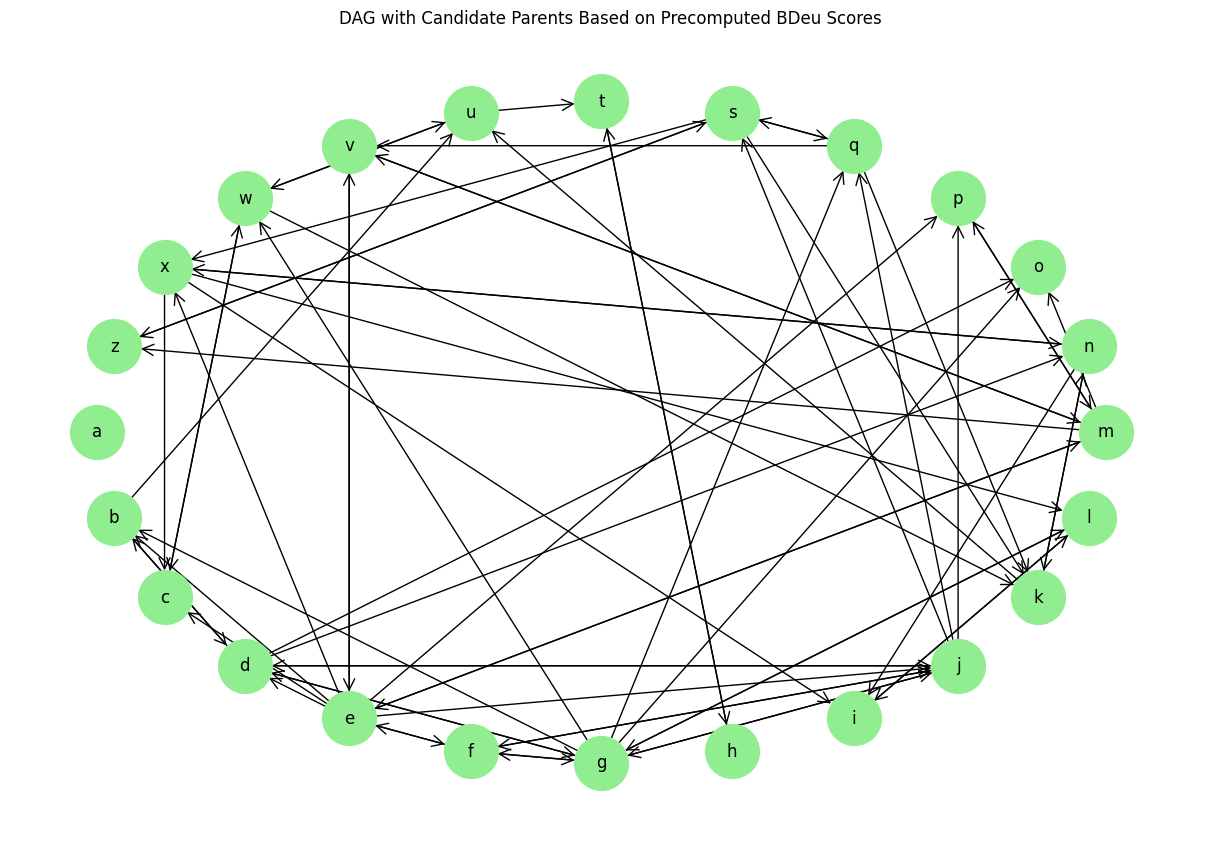

In [52]:

G_bdeu = nx.DiGraph()


for node in candidate_parents_per_node.keys():
    G_bdeu.add_node(node)


for node, parents in candidate_parents_per_node.items():
    for parent in parents:
        G_bdeu.add_edge(parent, node)


plt.figure(figsize=(12, 8))
pos = nx.shell_layout(G_bdeu)  # Same layout for comparison
nx.draw(G_bdeu, pos, with_labels=True, node_color='lightgreen', node_size=1500, arrowstyle='->', arrowsize=20)
plt.title("DAG with Candidate Parents Based on Precomputed BDeu Scores")
plt.show()


In [55]:
import numpy as np

import numpy as np

def calculate_posterior_probability(G, theta, data, node_states, alpha=1.0):
    """
    Calculate the posterior probability of a DAG given the data and Dirichlet prior.
    
    Parameters:
    - G: The directed acyclic graph (DAG).
    - theta: Conditional probability table (from sample_theta_given_g).
    - data: The data used for learning the structure.
    - node_states: Possible states of each node (binary in this case).
    - alpha: Dirichlet prior parameter.
    
    Returns:
    - Posterior probability of the DAG.
    """
    # Check for cycles in G_bdeu

    log_posterior = 0
    nodes = list(nx.topological_sort(G))

    for node in nodes:
        parents = list(G.predecessors(node))
        for index, row in data.iterrows():
            node_state = row[node]
            if len(parents) == 0:
               
                prior_prob = theta[node][()]
                log_posterior += np.log(prior_prob[node_state])
            else:
                
                parent_values = tuple(row[parent] for parent in parents)
                conditional_prob = theta[node][parent_values]
                log_posterior += np.log(conditional_prob[node_state])
    
    return log_posterior


def remove_cycles_from_dag(G):
    """
    Remove cycles from the graph G to ensure it's a DAG.
    
    Parameters:
    - G: The graph that may contain cycles.
    
    Returns:
    - A new graph with cycles removed.
    """
    try:
        
            cycle = list(nx.find_cycle(G))
            if cycle:
                print(f"Removing edge: {cycle[0]}")
                G.remove_edge(*cycle[0])  # Remove the first edge in the cycle
    except nx.exception.NetworkXNoCycle:
        print("All cycles removed. The graph is now a valid DAG.")
    return G

G_bdeu = remove_cycles_from_dag(G_bdeu)


posterior_original = calculate_posterior_probability(G, theta, df, node_states)

all_nodes = set(G_bdeu.nodes()).union(set(G.nodes())) 
node_states = {node: [0, 1] for node in all_nodes}


missing_nodes = [node for node in G_bdeu.nodes if node not in node_states]
if missing_nodes:
    for node in missing_nodes:
        node_states[node] = [0, 1]  

theta_bdeu = sample_theta_given_g(G_bdeu, node_states, alpha=alpha)
posterior_bdeu = calculate_posterior_probability(G_bdeu, theta_bdeu, df, node_states)



print(f"Posterior Probability (Original DAG): {posterior_original}")
print(f"Posterior Probability (BDeu-based DAG): {posterior_bdeu}")





All cycles removed. The graph is now a valid DAG.
Posterior Probability (Original DAG): -24489.189641545054
Posterior Probability (BDeu-based DAG): -24842.20129280944


In [54]:

print(df.columns) 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'u', 'v', 'w', 't', 's', 'x', 'z', 'i', 'ö'],
      dtype='object')
